In [1]:
import numpy as np
import pandas as pd
import h5py
import pysam
import os
from modisco.visualization import viz_sequence
from modisco import util
from matplotlib import pyplot as plt
import pybedtools

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
dttype = 'dnase'
mode = 'profile'
#modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
#ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'
modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'

background=[0.25, 0.25, 0.25, 0.25]

# Functions

In [3]:
def _plot_weights(array,
                  figsize=(10,3),
                 **kwargs):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    viz_sequence.plot_weights_given_ax(ax=ax, array=array,**kwargs)
    plt.show()
    plt.close()

# Fetch PPMs

metacluster_0
pattern_0


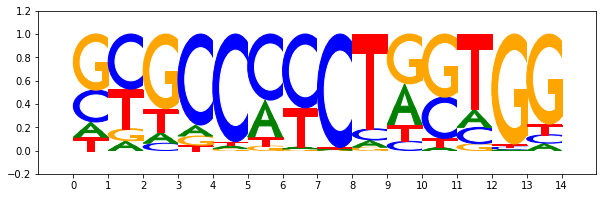

pattern_1


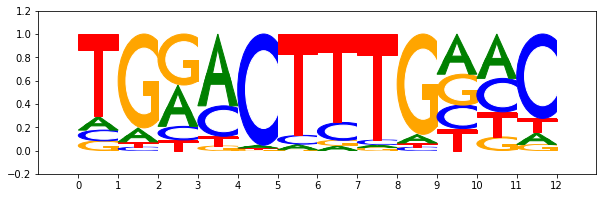

pattern_2


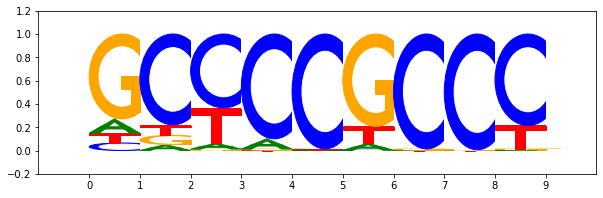

pattern_3


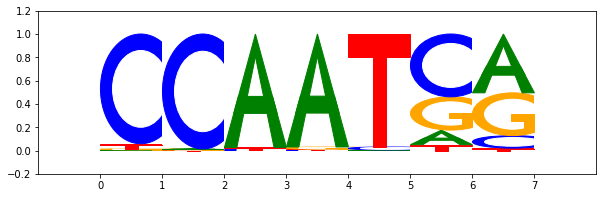

pattern_4


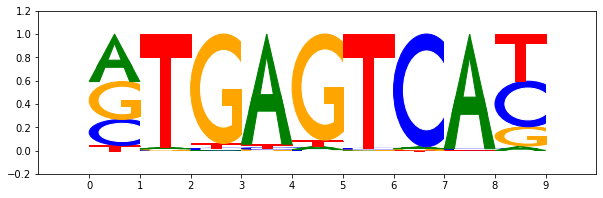

pattern_5


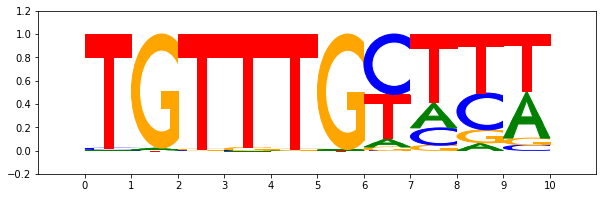

pattern_6


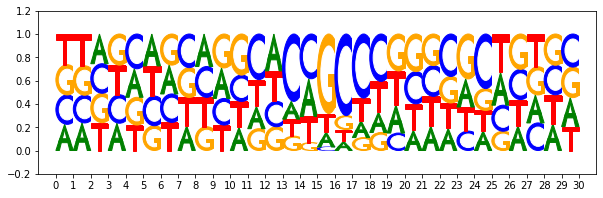

pattern_7


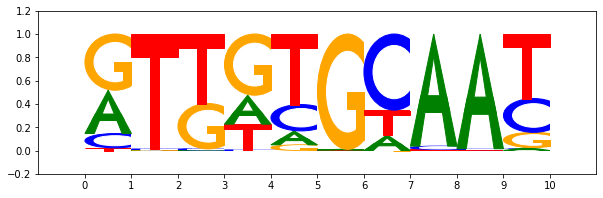

pattern_8


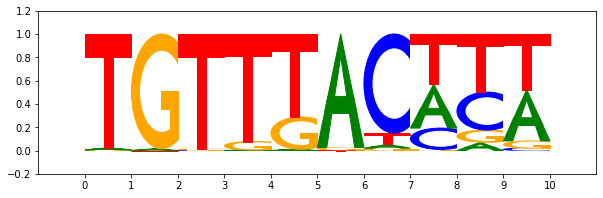

pattern_9


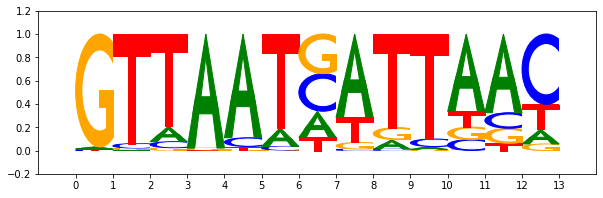

pattern_10


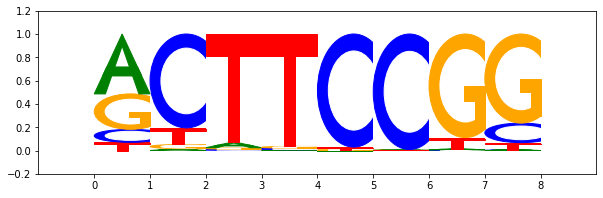

pattern_11


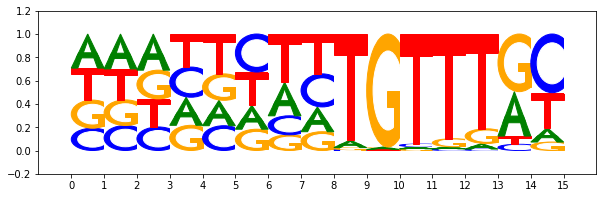

pattern_12


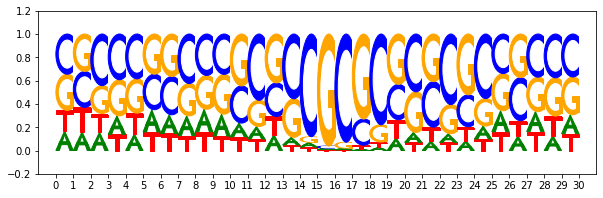

pattern_13


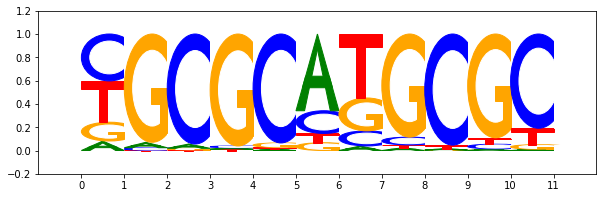

pattern_14


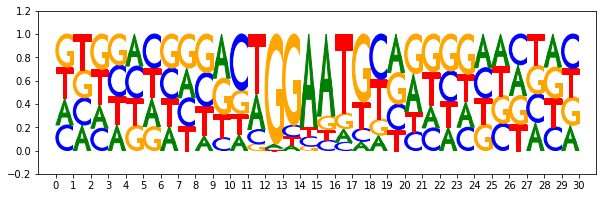

pattern_15


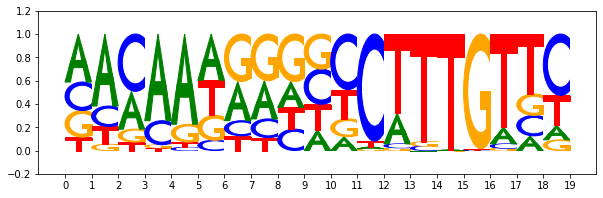

pattern_16


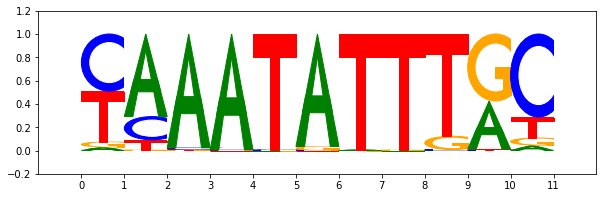

pattern_17


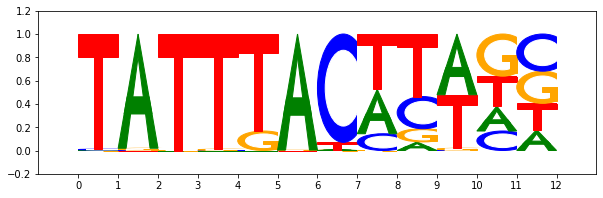

pattern_18


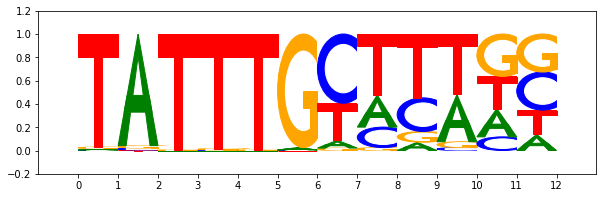

pattern_19


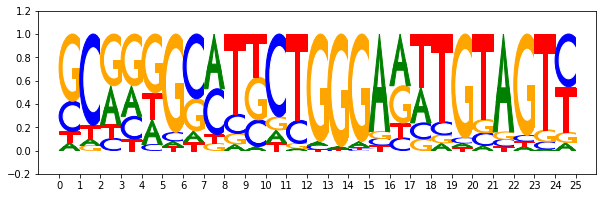

pattern_20


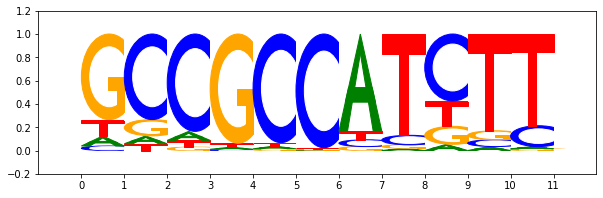

pattern_21


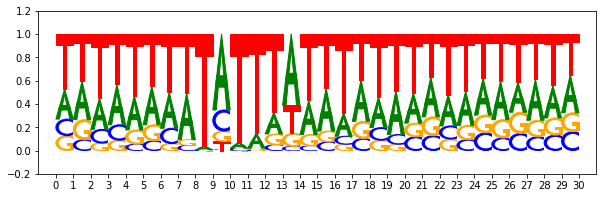

pattern_22


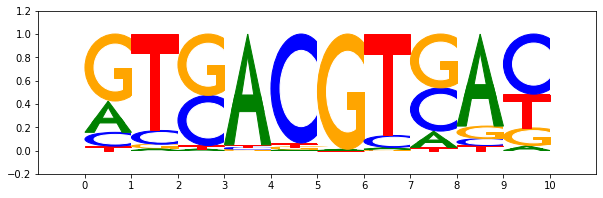

pattern_23


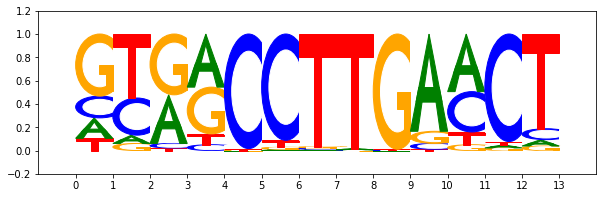

pattern_24


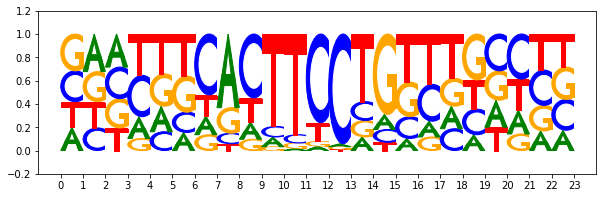

pattern_25


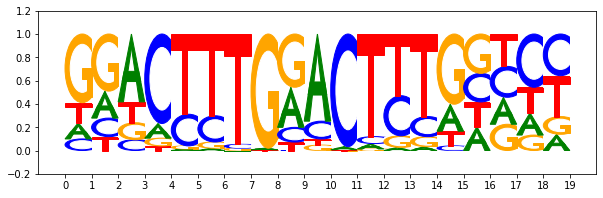

pattern_26


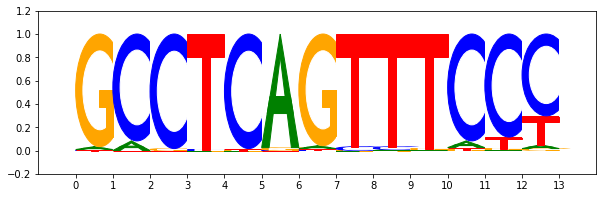

pattern_27


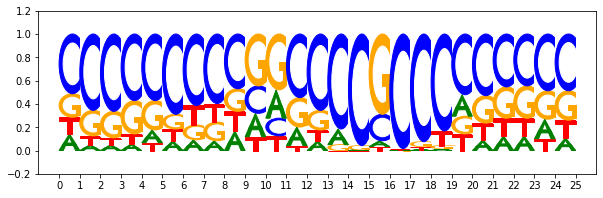

pattern_28


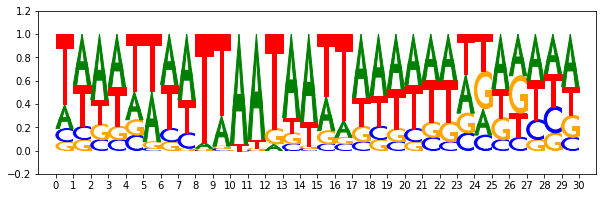

pattern_29


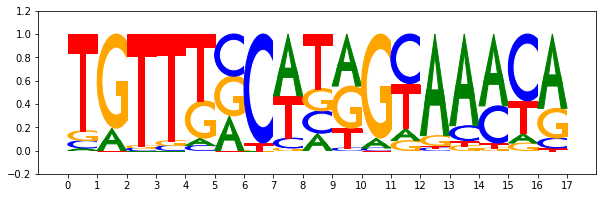

pattern_30


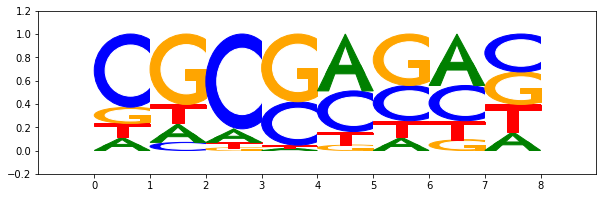

pattern_31


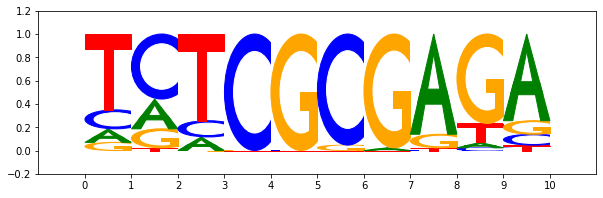

pattern_32


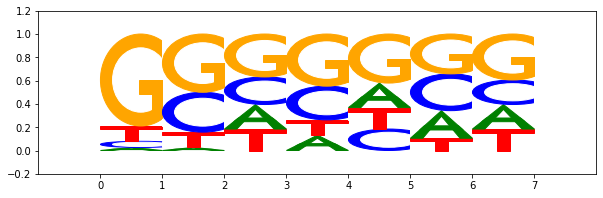

pattern_33


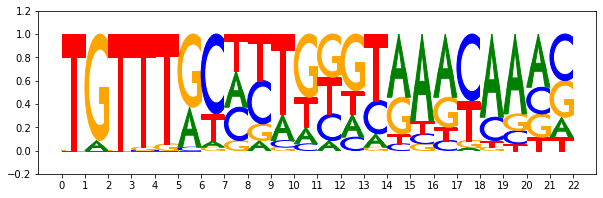

pattern_34


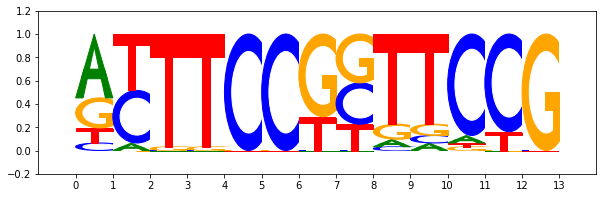

pattern_35


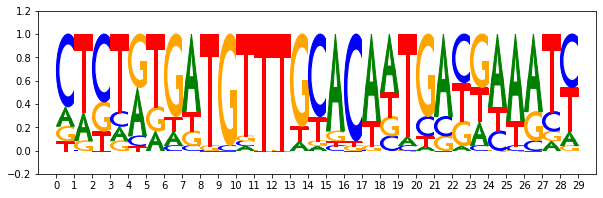

pattern_36


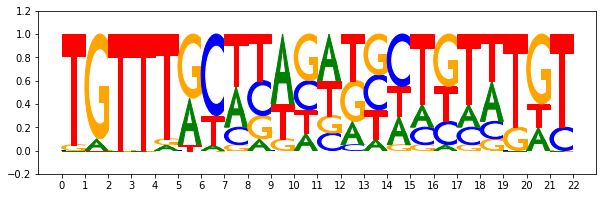

pattern_37


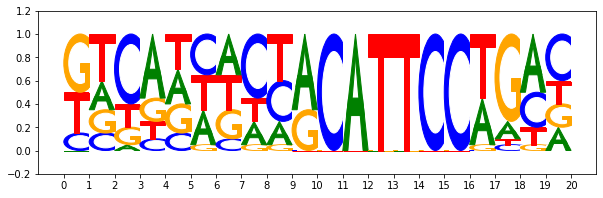

metacluster_1
pattern_0


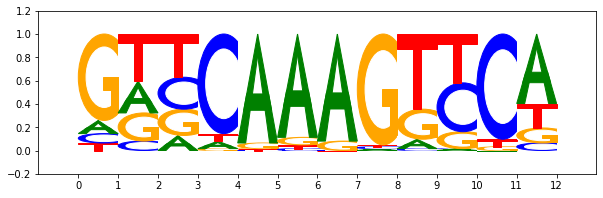

pattern_1


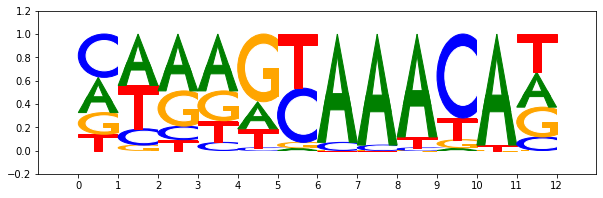

pattern_2


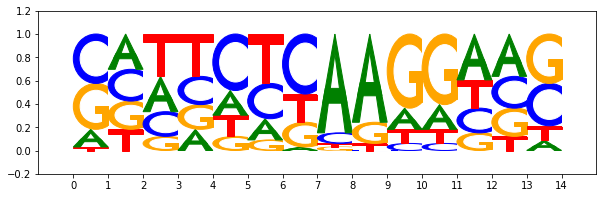

pattern_3


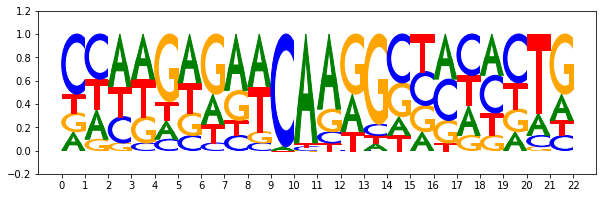

In [9]:
modisco_results = h5py.File(modisco_path, 'r')

ppms = []
for metacluster_name in modisco_results["metacluster_idx_to_submetacluster_results"]:
    print(metacluster_name)

    metacluster = modisco_results["metacluster_idx_to_submetacluster_results"][metacluster_name]
    all_pattern_names = [x.decode("utf-8") for x in list(metacluster["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

    for pattern_name in all_pattern_names:
        print(pattern_name)

        ppm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['sequence']['fwd'])
        cwm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]["task0_contrib_scores"]['fwd'])
        num_seqlets = len(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['seqlets_and_alnmts']['seqlets'])

        
        score = np.sum(np.abs(cwm), axis=1)
        trim_thresh = np.max(score) * 0.25  # Cut off anything less than 30% of max score
        pass_inds = np.where(score >= trim_thresh)[0]
        trimmed = ppm[np.min(pass_inds): np.max(pass_inds) + 1]
        ppms.append(trimmed)
        #pfm = trimmed * num_seqlets
        #pfm = pfm.astype(int)
                
        _plot_weights(trimmed)
        

        #np.savetxt(ppm_dir  + '/'  + mode + '/' + metacluster_name + '.' + pattern_name + '.pfm.fwd.txt', pfm.transpose().astype(int), fmt='%i')


In [10]:
ppms = np.array(ppms)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [11]:
ppms.shape

(42,)

In [12]:
ppms

array([array([[0.1305638 , 0.27349159, 0.48170129, 0.11424332],
              [0.08391032, 0.47279921, 0.10286845, 0.34042202],
              [0.1005605 , 0.06214969, 0.64127926, 0.19601055],
              [0.09446093, 0.7812397 , 0.07863501, 0.04566436],
              [0.02901418, 0.92383778, 0.01615562, 0.03099242],
              [0.31684801, 0.56709529, 0.03808111, 0.0779756 ],
              [0.01945269, 0.63369601, 0.01417738, 0.33267392],
              [0.01005605, 0.97362348, 0.0049456 , 0.01137488],
              [0.06231454, 0.0956149 , 0.0278602 , 0.81421035],
              [0.34965381, 0.07879987, 0.42762941, 0.14391691],
              [0.03379492, 0.35410485, 0.54203759, 0.07006264],
              [0.1608968 , 0.14111441, 0.05753379, 0.640455  ],
              [0.012364  , 0.01615562, 0.94427959, 0.02720079],
              [0.06313881, 0.07237059, 0.77299703, 0.09149357]]),
       array([[0.12215396, 0.09179617, 0.08312252, 0.70292736],
              [0.11998554, 0.02782797,